import packages

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

교촌, 비비큐 치킨에 대한 검색량

https://trends.google.com/trends/?geo=KR 통해 대한민국에서의 검색량을 조사

비비큐 치킨은 "bbq", "비비큐"의 검색량을 조사한 뒤 더함

In [258]:
df = pd.read_csv('multiTimeline.csv')

In [259]:
df

,일,bbq,비비큐,교촌
0,2022-10-27,45,8,7
1,2022-10-28,50,13,68
2,2022-10-29,53,0,35
3,2022-10-30,49,17,44
4,2022-10-31,32,8,11
5,2022-11-01,38,0,15
6,2022-11-02,32,0,34
7,2022-11-03,38,0,39
8,2022-11-04,54,24,36
9,2022-11-05,80,14,49


In [260]:
df['bbq'] += df['비비큐']
df.drop('비비큐', inplace=True, axis=1)
df.drop('일', inplace=True, axis=1)
df.rename(columns={'교촌': 'Kyochon'}, inplace=True)

df

,bbq,Kyochon
0,53,7
1,63,68
2,53,35
3,66,44
4,40,11
5,38,15
6,32,34
7,38,39
8,78,36
9,94,49


In [261]:
df = df[9:]
df

,bbq,Kyochon
9,94,49
10,64,56
11,58,36
12,59,33
13,56,43
14,46,53
15,100,51
16,87,25
17,100,45
18,15,49


각각의 검색량 그래프

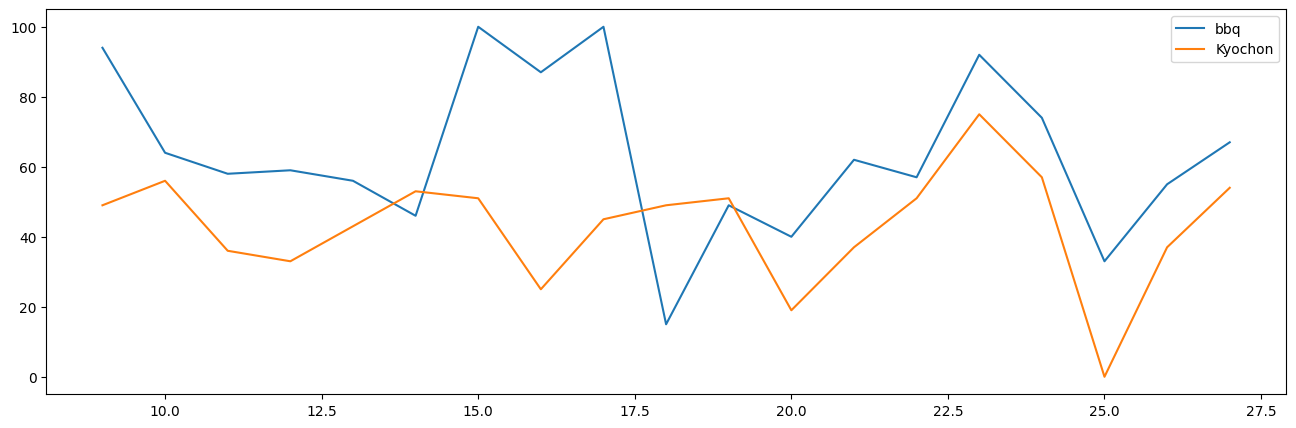

In [262]:
df.plot(figsize=(16, 5))
plt.show()

### 추세 분석
차수: DEG

의사역행렬을 이용하여 가장 가까운 해를 찾음

In [263]:
DEG = 9     # 12 이상은 안됨

In [264]:
a = np.matrix([
    [i**j for j in range(DEG+1)] for i in range(df['bbq'].size)
])

bbq = np.matrix(df['bbq']).transpose()
kyo = np.matrix(df['Kyochon']).transpose()

a.shape

(19, 10)

In [265]:
bbq

matrix([[ 94],
        [ 64],
        [ 58],
        [ 59],
        [ 56],
        [ 46],
        [100],
        [ 87],
        [100],
        [ 15],
        [ 49],
        [ 40],
        [ 62],
        [ 57],
        [ 92],
        [ 74],
        [ 33],
        [ 55],
        [ 67]])

In [266]:
mp_inverse = np.linalg.pinv(a)
mp_inverse.shape

(10, 19)

In [267]:
mp_inverse.tolist()[0]

[0.9966672159239754,
 0.01852195222701322,
 -0.03541415552081163,
 0.0185257031584008,
 0.016726621408001036,
 -0.008086189821135032,
 -0.015637421167537476,
 -0.0030508790400107,
 0.010679475971394702,
 0.010679196213547567,
 -0.0010681432601074346,
 -0.010679399459122385,
 -0.007246584116762634,
 0.005339794573881887,
 0.010733820327439482,
 -0.0011334149256423233,
 -0.012640872117440275,
 0.0089358362988559,
 -0.0018525566739400032]

In [268]:
bbq_coeff = np.matmul(mp_inverse, bbq)
kyo_coeff = np.matmul(mp_inverse, kyo)

bbq_coeff

matrix([[ 9.41042165e+01],
        [-1.09097261e+02],
        [ 1.38112591e+02],
        [-8.14088663e+01],
        [ 2.48178132e+01],
        [-4.21807571e+00],
        [ 4.15207167e-01],
        [-2.35143587e-02],
        [ 7.10737226e-04],
        [-8.87996102e-06]])

In [269]:
bbq_poly = np.poly1d(bbq_coeff.transpose().tolist()[0][::-1])
kyo_poly = np.poly1d(kyo_coeff.transpose().tolist()[0][::-1])

print(bbq_poly)

           9             8           7          6         5         4
-8.88e-06 x + 0.0007107 x - 0.02351 x + 0.4152 x - 4.218 x + 24.82 x
          3         2
 - 81.41 x + 138.1 x - 109.1 x + 94.1


In [270]:
plot_x = np.linspace(0, df['bbq'].size-1, 300)

bbq_y = [bbq_poly(i) for i in plot_x]
kyo_y = [kyo_poly(i) for i in plot_x]

In [271]:
bbq_poly( df['bbq'].size-1)

67.3502537484776

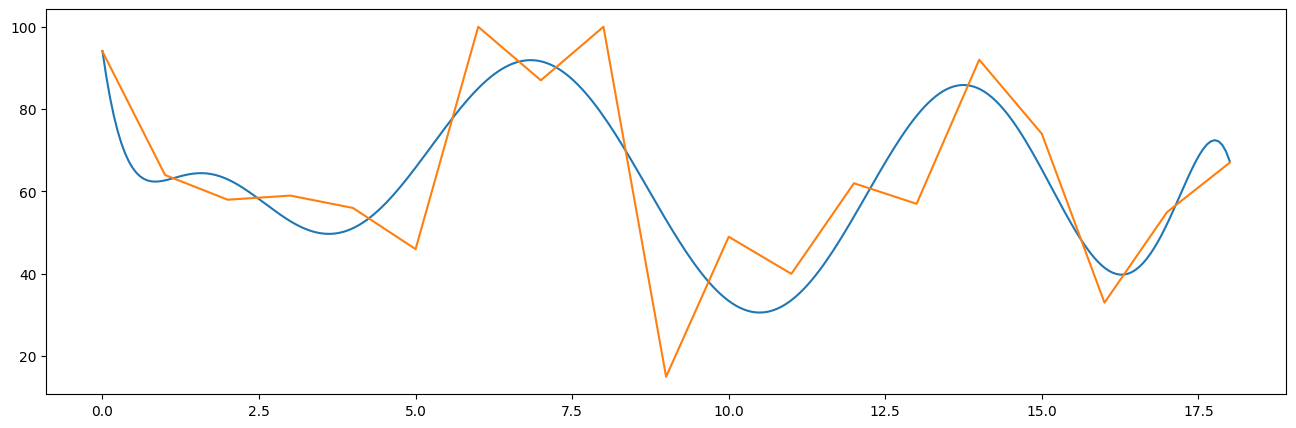

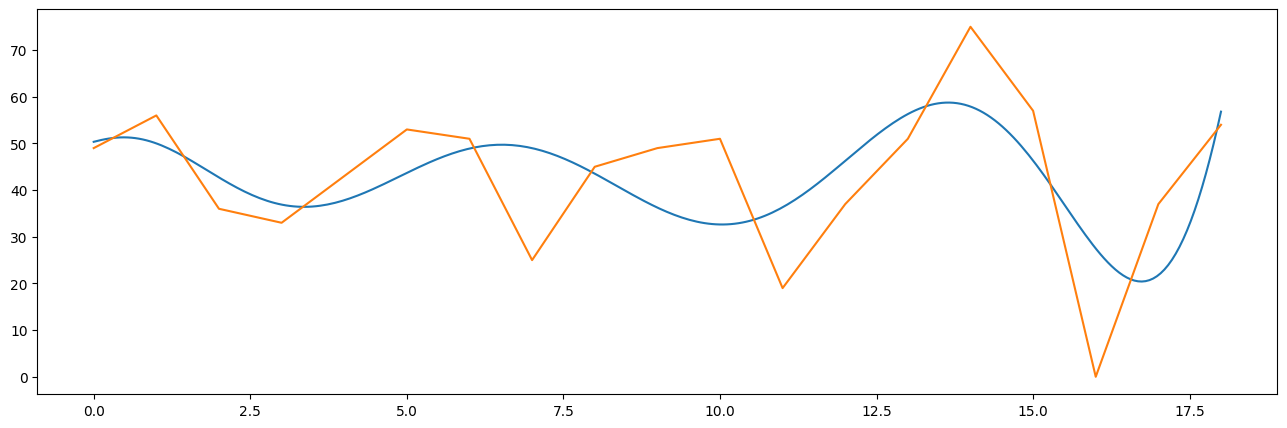

In [272]:
plt.figure(figsize=(16, 5))
plt.plot(plot_x, bbq_y, label="bbq_trend")
plt.plot([i for i in range(df['bbq'].size)], df['bbq'], label="bbq")
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(plot_x, kyo_y, label="Kyochon_trend")
plt.plot([i for i in range(df['bbq'].size)], df['Kyochon'], label="Kyochon")
plt.show()